<a href="https://colab.research.google.com/github/Rashilajayasinghe/DomainSpecified_AI_Assistant/blob/main/Synthetic_Data_Creation(rec).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ctgan

In [ ]:
import pandas as pd
import numpy as np
from ctgan import CTGAN

In [ ]:
!pip install table_evaluator

In [ ]:
df = pd.read_csv("/content/sample_data/dataset.csv")

In [ ]:
df

,Stage,hours_per_week,academic_stress,choosing_new_courses_decision,Mng_academic_tasks,struggle_with_managing,challenges_handling_workload,start_assignments_closer_deadline,Skill_Programming,Skill_Math,...,Grade_CM3606,Grade_CM3604,Grade_CM3602,Grade_CM3603,Grade_CM4605,Grade_CM4604,Grade_CM4601,Grade_CM4606,Grade_CM4603,Predicted_Success_DL
0,Stage 1,3 - 5 hrs,4,Personal interest in the subject;Career or job...,To-do list or planner apps;I usually remember ...,Often,Forgetting deadlines or exam dates;Not knowing...,Always,3,2,...,-,-,-,-,-,-,-,-,-,NaN
1,Stage 2,3 - 5 hrs,4,Career or job relevance,Notes on phone or paper,Sometimes,Balancing multiple courses or projects,Sometimes,4,4,...,-,-,-,-,-,-,-,-,-,-
2,Stage 1,Less than 3hrs,2,Personal interest in the subject;Recommendatio...,I usually remember them mentally,Rarely,Not knowing how to prioritize task;Starting ta...,Always,3,3,...,-,-,-,-,-,-,-,-,-,NaN
3,Stage 1,3 - 5 hrs,5,Career or job relevance,I usually remember them mentally,Always,Balancing multiple courses or projects,Always,3,2,...,-,-,-,-,-,-,-,-,-,NaN
4,Stage 2,Less than 3hrs,4,Career or job relevance,I usually remember them mentally,Sometimes,Starting tasks too late,Sometimes,2,3,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Stage 1,Less than 3hrs,3,Career or job relevance,I usually remember them mentally,Sometimes,Starting tasks too late,Sometimes,4,3,...,-,-,-,-,-,-,-,-,-,NaN
154,Stage 3,5 - 10 hrs,3,Career or job relevance,To-do list or planner apps,Sometimes,Not knowing how to prioritize task,Sometimes,4,3,...,D,C,D,-,-,-,-,-,-,72
155,Stage 2,3 - 5 hrs,4,Career or job relevance,I usually remember them mentally,Always,Starting tasks too late,Always,3,2,...,-,-,-,-,-,-,-,-,-,-
156,Stage 3,5 - 10 hrs,3,Personal interest in the subject,To-do list or planner apps,Rarely,Balancing multiple courses or projects,Sometimes,4,5,...,C,C,C,-,-,-,-,-,-,87


In [ ]:
df = df.replace('-', np.nan)

In [ ]:
df

,Stage,hours_per_week,academic_stress,choosing_new_courses_decision,Mng_academic_tasks,struggle_with_managing,challenges_handling_workload,start_assignments_closer_deadline,Skill_Programming,Skill_Math,...,Grade_CM3606,Grade_CM3604,Grade_CM3602,Grade_CM3603,Grade_CM4605,Grade_CM4604,Grade_CM4601,Grade_CM4606,Grade_CM4603,Predicted_Success_DL
0,Stage 1,3 - 5 hrs,4,Personal interest in the subject;Career or job...,To-do list or planner apps;I usually remember ...,Often,Forgetting deadlines or exam dates;Not knowing...,Always,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Stage 2,3 - 5 hrs,4,Career or job relevance,Notes on phone or paper,Sometimes,Balancing multiple courses or projects,Sometimes,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Stage 1,Less than 3hrs,2,Personal interest in the subject;Recommendatio...,I usually remember them mentally,Rarely,Not knowing how to prioritize task;Starting ta...,Always,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Stage 1,3 - 5 hrs,5,Career or job relevance,I usually remember them mentally,Always,Balancing multiple courses or projects,Always,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Stage 2,Less than 3hrs,4,Career or job relevance,I usually remember them mentally,Sometimes,Starting tasks too late,Sometimes,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Stage 1,Less than 3hrs,3,Career or job relevance,I usually remember them mentally,Sometimes,Starting tasks too late,Sometimes,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Stage 3,5 - 10 hrs,3,Career or job relevance,To-do list or planner apps,Sometimes,Not knowing how to prioritize task,Sometimes,4,3,...,D,C,D,NaN,NaN,NaN,NaN,NaN,NaN,72
155,Stage 2,3 - 5 hrs,4,Career or job relevance,I usually remember them mentally,Always,Starting tasks too late,Always,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,Stage 3,5 - 10 hrs,3,Personal interest in the subject,To-do list or planner apps,Rarely,Balancing multiple courses or projects,Sometimes,4,5,...,C,C,C,NaN,NaN,NaN,NaN,NaN,NaN,87


In [ ]:
grade_cols = [col for col in df.columns if 'Grade_' in col]
rating_cols = [col for col in df.columns if 'Skill_' in col or col == 'academic_stress']
continuous_col = 'Predicted_Success_DL'

In [ ]:
# **FIX:** Explicitly convert the continuous column to numeric.
# This ensures median() can operate correctly on numerical data.
df[continuous_col] = pd.to_numeric(df[continuous_col], errors='coerce')

In [ ]:
for col in grade_cols + rating_cols:
    # Use .astype(str) and replace pandas NaT/None with np.nan for consistent filling
    df[col] = df[col].astype(str).replace('<NA>', np.nan)

In [ ]:
def impute_not_taken(row):
    try:
        stage = int(row['Stage'].split(' ')[-1])
    except:
        return row

    # Correct prefixes to match actual dataset columns
    if stage == 1:
        not_expected_prefixes = ['Grade_CM26', 'Grade_CM36', 'Grade_CM46']
    elif stage == 2:
        not_expected_prefixes = ['Grade_CM36', 'Grade_CM46']
    elif stage == 3:
        not_expected_prefixes = ['Grade_CM46']
    else:
        not_expected_prefixes = []

    for col in grade_cols:
        if any(col.startswith(prefix) for prefix in not_expected_prefixes):
            if pd.isna(row[col]):
                row[col] = 'NOT_TAKEN'

    return row


In [ ]:
df = df.apply(impute_not_taken, axis=1)



In [ ]:
categorical_cols_for_mode = [col for col in df.columns if col != continuous_col]

In [ ]:
for col in categorical_cols_for_mode:
    # Calculate the mode only on existing, non-NaN, non-NOT_TAKEN values
    # This prevents 'NOT_TAKEN' from skewing the mode of actual grades.
    mode_val_series = df[col].replace('NOT_TAKEN', np.nan).mode()

    if not mode_val_series.empty:
        # Impute remaining NaNs with the calculated mode
        df[col].fillna(mode_val_series.iloc[0], inplace=True)
    else:
        # Fallback for columns with no valid mode (shouldn't happen here)
        df[col].fillna('Unknown', inplace=True)

/tmp/ipython-input-3470181579.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val_series.iloc[0], inplace=True)


In [ ]:
# Impute the continuous column with the median
median_val = df[continuous_col].median()
df[continuous_col].fillna(median_val, inplace=True)

/tmp/ipython-input-2537632818.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[continuous_col].fillna(median_val, inplace=True)


In [ ]:
final_categorical_cols = [col for col in df.columns if col != continuous_col]

In [ ]:
print("--- Preprocessing Complete ---")
print("Data head (first 5 rows):")
print(df.head())
print("\nFinal Categorical Columns for CTGAN (37 columns):")
print(final_categorical_cols)

--- Preprocessing Complete ---
Data head (first 5 rows):
     Stage hours_per_week  academic_stress  \
0  Stage 1       3 - 5 hrs               4   
1  Stage 2       3 - 5 hrs               4   
2  Stage 1  Less than 3hrs               2   
3  Stage 1       3 - 5 hrs               5   
4  Stage 2  Less than 3hrs               4   

                      choosing_new_courses_decision   \
0  Personal interest in the subject;Career or job...   
1                            Career or job relevance   
2  Personal interest in the subject;Recommendatio...   
3                            Career or job relevance   
4                            Career or job relevance   

                                  Mng_academic_tasks struggle_with_managing   \
0  To-do list or planner apps;I usually remember ...                   Often   
1                            Notes on phone or paper               Sometimes   
2                   I usually remember them mentally                  Rarely   
3        

In [ ]:
df.to_csv('corrected_preprocessed_data_for_ctgan.csv', index=False)

# *CTGAN Training*

In [ ]:
data = pd.read_csv('corrected_preprocessed_data_for_ctgan.csv')
final_categorical_cols = [
    'Stage', 'hours_per_week', 'academic_stress', 'choosing_new_courses_decision',
    'Mng_academic_tasks', 'struggle_with_managing', 'challenges_handling_workload',
    'start_assignments_closer_deadline', 'Skill_Programming', 'Skill_Math',
    'Skill_DS_Algo', 'Skill_Technical_Comm', 'Skill_Web_Development',
    'Grade_CM1601', 'Grade_CM1602', 'Grade_CM1603', 'Grade_CM1604',
    'Grade_CM1605', 'Grade_CM1606', 'Grade_CM1607', 'Grade_CM2601',
    'Grade_CM2602', 'Grade_CM2603', 'Grade_CM2604', 'Grade_CM2605',
    'Grade_CM2606', 'Grade_CM2607', 'Grade_CM3606', 'Grade_CM3604',
    'Grade_CM3602', 'Grade_CM3603', 'Grade_CM4605', 'Grade_CM4604',
    'Grade_CM4601', 'Grade_CM4606', 'Grade_CM4603'
]

In [ ]:
continuous_col = 'Predicted_Success_DL'
final_categorical_cols = [col for col in data.columns if col != continuous_col]

In [ ]:
ctgan = CTGAN(epochs=500, batch_size=500)
print("--- Starting CTGAN Training ---")
ctgan.fit(data, final_categorical_cols)
print("--- CTGAN Training Complete ---")

--- Starting CTGAN Training ---
--- CTGAN Training Complete ---


In [ ]:
# Generate new synthetic samples (e.g., 1000 new rows)
synthetic_data = ctgan.sample(10000)

In [ ]:
print("\n--- Synthetic Data Generated ---")
print(synthetic_data.head())


--- Synthetic Data Generated ---
     Stage hours_per_week   academic_stress  \
0  Stage 2      5 - 10 hrs                4   
1  Stage 3      5 - 10 hrs                3   
2  Stage 4       3 - 5 hrs                3   
3  Stage 3      5 - 10 hrs                3   
4  Stage 2  Less than 3hrs                3   

                      choosing_new_courses_decision   \
0  Personal interest in the subject;Career or job...   
1                   Personal interest in the subject   
2                            Career or job relevance   
3                   Personal interest in the subject   
4                            Career or job relevance   

           Mng_academic_tasks struggle_with_managing   \
0     Notes on phone or paper               Sometimes   
1  To-do list or planner apps               Sometimes   
2  To-do list or planner apps               Sometimes   
3  To-do list or planner apps                  Rarely   
4  To-do list or planner apps               Sometimes   

   

In [ ]:
def enforce_grade_consistency(row):
    """Resets grades for future modules based on the student's Stage."""
    try:
        stage = int(row['Stage'].split(' ')[-1])
    except:
        return row

    # Correct prefixes to match real column names
    not_expected_prefixes = []
    if stage == 1:
        not_expected_prefixes.extend(['Grade_CM26', 'Grade_CM36', 'Grade_CM46'])
    elif stage == 2:
        not_expected_prefixes.extend(['Grade_CM36', 'Grade_CM46'])
    elif stage == 3:
        not_expected_prefixes.extend(['Grade_CM46'])

    grade_cols = [c for c in row.index if c.startswith('Grade_CM')]

    for col in grade_cols:
        if any(col.startswith(prefix) for prefix in not_expected_prefixes):
            row[col] = 'NOT_TAKEN'

    return row


# Apply correction
synthetic_data_corrected = synthetic_data.apply(enforce_grade_consistency, axis=1)


In [ ]:
print("\n--- Synthetic Data Correction Applied ---")
print("First 5 corrected rows:")
print(synthetic_data_corrected.head())


--- Synthetic Data Correction Applied ---
First 5 corrected rows:
     Stage hours_per_week   academic_stress  \
0  Stage 2      5 - 10 hrs                4   
1  Stage 3      5 - 10 hrs                3   
2  Stage 4       3 - 5 hrs                3   
3  Stage 3      5 - 10 hrs                3   
4  Stage 2  Less than 3hrs                3   

                      choosing_new_courses_decision   \
0  Personal interest in the subject;Career or job...   
1                   Personal interest in the subject   
2                            Career or job relevance   
3                   Personal interest in the subject   
4                            Career or job relevance   

           Mng_academic_tasks struggle_with_managing   \
0     Notes on phone or paper               Sometimes   
1  To-do list or planner apps               Sometimes   
2  To-do list or planner apps               Sometimes   
3  To-do list or planner apps                  Rarely   
4  To-do list or planner app

(158, 37) (10000, 37)


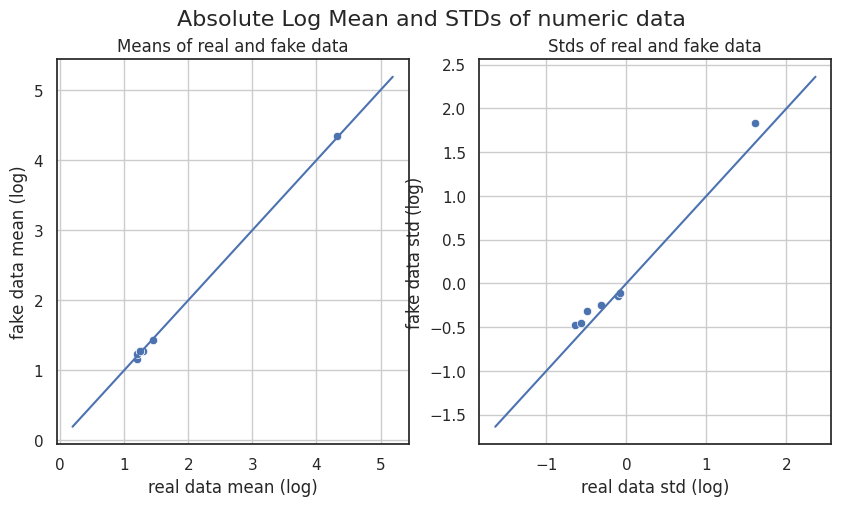

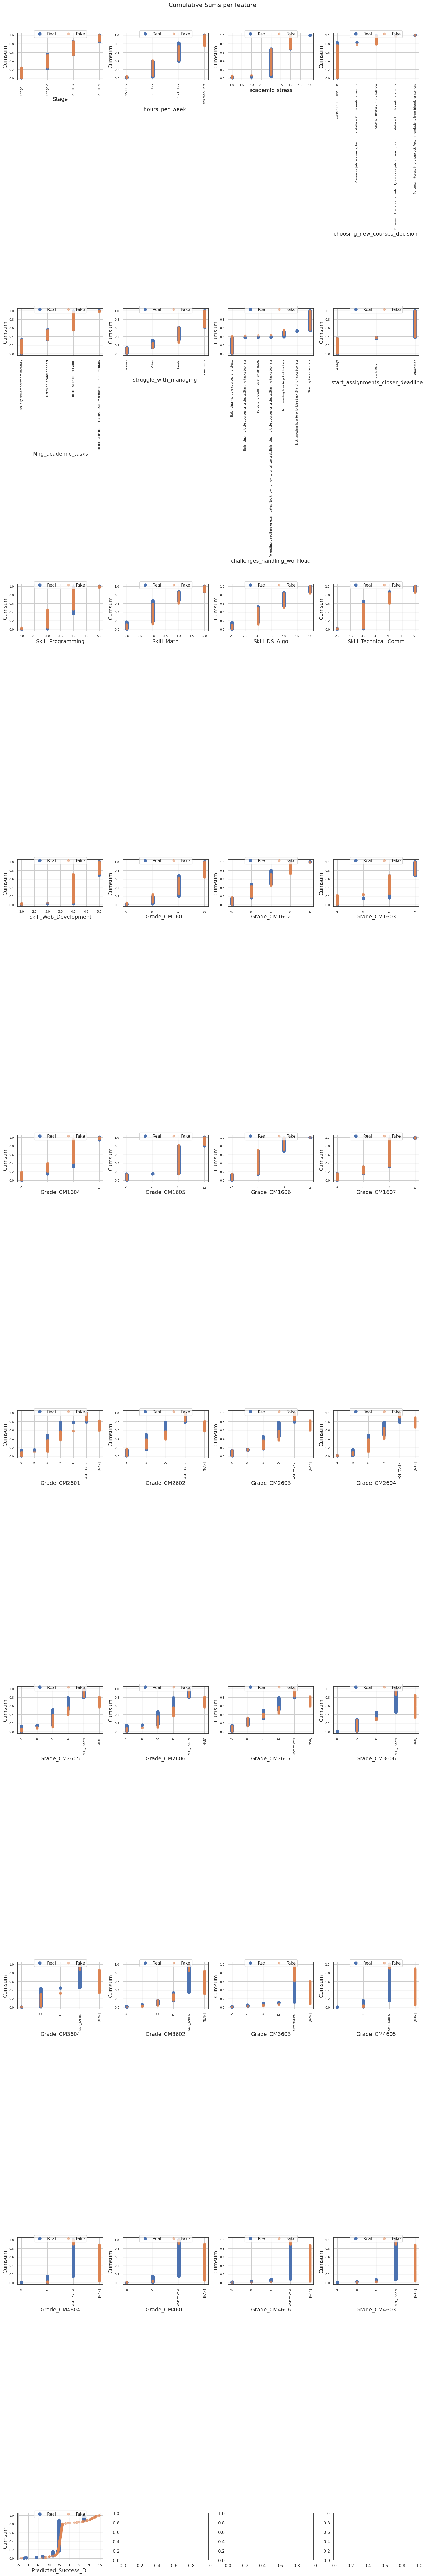

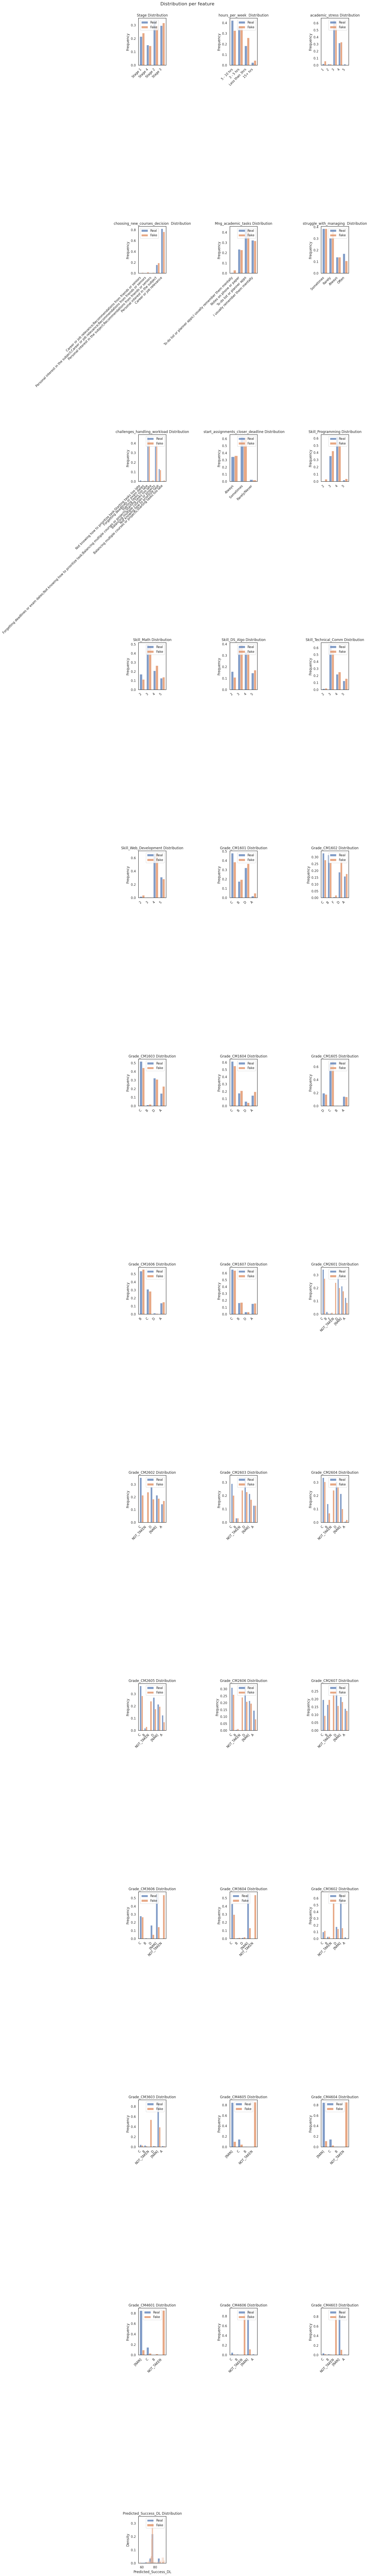

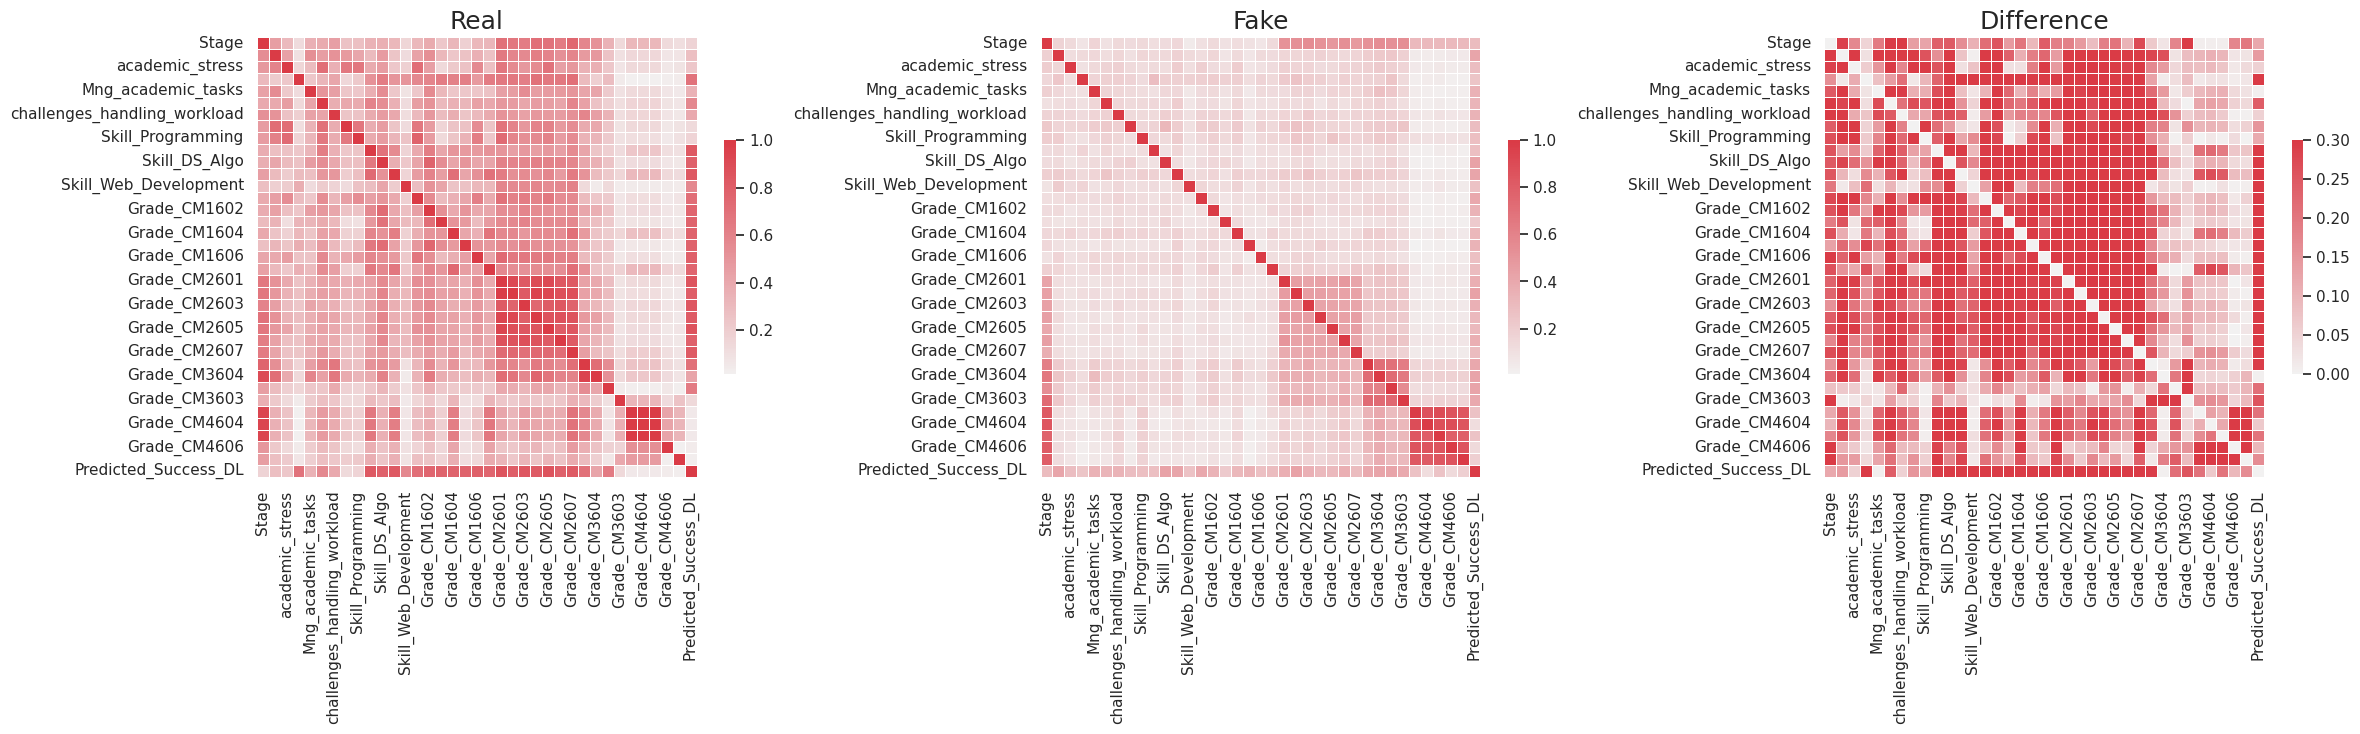

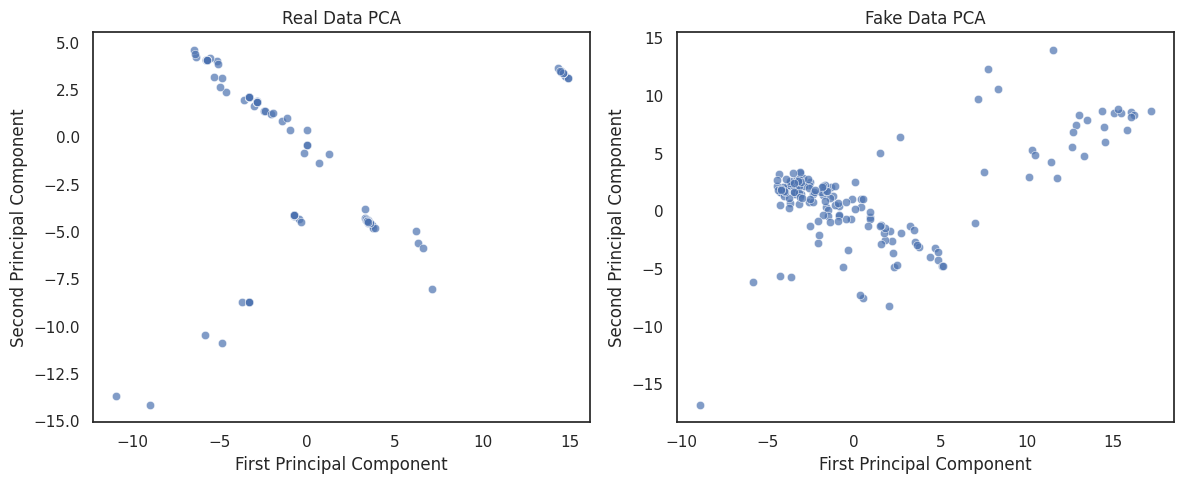

In [ ]:
from table_evaluator import TableEvaluator

print(data.shape, synthetic_data_corrected.shape)
table_evaluator =  TableEvaluator(data, synthetic_data_corrected , cat_cols= final_categorical_cols)

table_evaluator.visual_evaluation()

In [ ]:
synthetic_data_corrected.to_csv('fin_synthetic_samples.csv', index=False)